In [1]:
from sklearn.datasets import fetch_openml
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784')

In [4]:
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array([5, 0, 4, ..., 4, 5, 6])}

In [3]:
mnist = {'data':mnist['data'], 'target':np.array(list(map(int, mnist['target'])))}

In [5]:
X, y = mnist['data'], mnist['target']

In [6]:
X.shape

(70000, 784)

In [7]:
y.shape

(70000,)

In [8]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

In [9]:
some_digit = X[3600]
some_digit_image = some_digit.reshape(28,28)

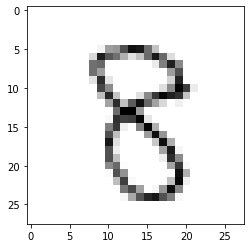

In [10]:
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary, interpolation='nearest')

In [11]:
y[3600]

8

In [12]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [14]:
y_train_5 = (y_train == 5)
y_test_5 = (y_test == 5)

In [15]:
from sklearn.linear_model import SGDClassifier

In [16]:
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_5)

SGDClassifier(random_state=42)

In [17]:
sgd_clf.predict([some_digit])

array([False])

In [19]:
from sklearn.model_selection import cross_val_score

In [19]:
cross_val_score(sgd_clf, X_train, y_train_5, cv=3, scoring='accuracy')

array([0.95035, 0.96035, 0.9604 ])

In [20]:
from sklearn.model_selection import cross_val_predict

In [21]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3)

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_train_5, y_train_pred)

array([[53892,   687],
       [ 1891,  3530]], dtype=int64)

In [13]:
from sklearn.metrics import precision_score, recall_score

In [25]:
precision_score(y_train_5, y_train_pred)

0.8370879772350012

In [26]:
recall_score(y_train_5, y_train_pred)

0.6511713705958311

In [14]:
from sklearn.metrics import f1_score

In [28]:
f1_score(y_train_5, y_train_pred)

0.7325171197343846

In [30]:
y_scores = sgd_clf.decision_function([some_digit])

In [32]:
y_scores > 0

array([False])

In [34]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train_5, cv=3, method='decision_function')

In [35]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [36]:
from sklearn.metrics import precision_recall_curve

In [42]:
precisions, recalls, treshholds = precision_recall_curve(y_train_5, y_scores)

In [43]:
precisions.shape, recalls.shape, treshholds.shape

((59967,), (59967,), (59966,))

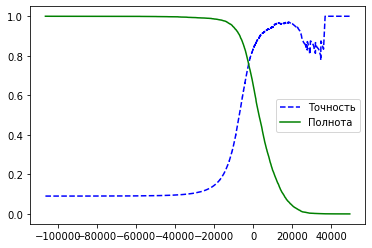

In [49]:
plt.plot(treshholds, precisions[:-1], '--b', label='Точность')
plt.plot(treshholds, recalls[:-1], 'g-', label="Полнота")
plt.legend();

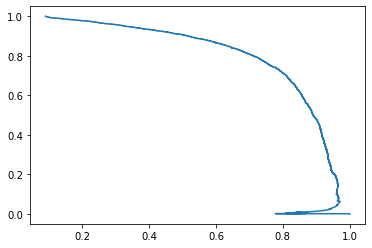

In [51]:
plt.plot(precisions, recalls)

In [71]:
y_train_pred_better90 = (y_scores > 15000)

In [69]:
y_train_pred_better90

array([False, False, False, ..., False, False, False])

In [72]:
recall_score(y_train_5, y_train_pred_better90), precision_score(y_train_5, y_train_pred_better90)

(0.10514665190924184, 0.9612141652613828)

In [73]:
from sklearn.metrics import roc_curve

In [78]:
fpr, tpr, thresholds = roc_curve(y_train_5, y_scores)

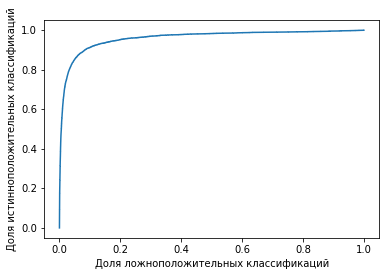

In [82]:
plt.plot(fpr, tpr)
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций');

In [15]:
from sklearn.metrics import roc_auc_score

In [85]:
roc_auc_score(y_train_5, y_scores)

0.9604938554008616

In [86]:
y_scores

array([  1200.93051237, -26883.79202424, -33072.03475406, ...,
        13272.12718981,  -7258.47203373, -16877.50840447])

In [87]:
y_train_5

array([ True, False, False, ...,  True, False, False])

In [88]:
y_train_pred

array([ True, False, False, ...,  True, False, False])

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [92]:
rf_clf = RandomForestClassifier(random_state=42)
y_proba_forest = cross_val_predict(rf_clf, X_train, y_train_5, cv=3, method='predict_proba')

In [94]:
y_forest_scores = y_proba_forest[:, 1]

In [96]:
ffpr, ftpr, thresholds = roc_curve(y_train_5, y_forest_scores)

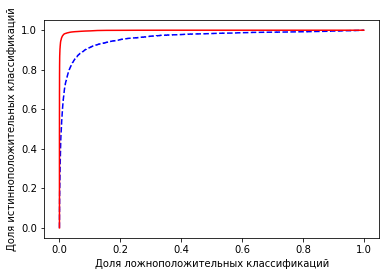

In [97]:
plt.plot(fpr, tpr, 'b--')
plt.plot(ffpr, ftpr, 'r-')
plt.xlabel('Доля ложноположительных классификаций')
plt.ylabel('Доля истинноположительных классификаций');

In [101]:
roc_auc_score(y_train_5, y_forest_scores)

0.9983436731328145

In [103]:
precision_score(y_train_5, (y_forest_scores>0.5)), recall_score(y_train_5, (y_forest_scores>0.5))

(0.9905083315756169, 0.8662608374838591)

In [104]:
sgd_clf.fit(X_train, y_train)

SGDClassifier(random_state=42)

In [105]:
sgd_clf.predict([some_digit])

array([3])

In [106]:
sgd_clf.decision_function([some_digit])

array([[-23578.03672137, -24721.54989091,  -2396.14240372,
           381.05817912,  -6221.66436973,  -3351.84816032,
        -15418.82788596, -13576.13710225,    302.7572384 ,
         -5520.1579946 ]])

In [107]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [108]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [109]:
rf_clf.predict([some_digit])

array([8])

In [110]:
rf_clf.predict_proba([some_digit])

array([[0.01, 0.01, 0.02, 0.04, 0.02, 0.05, 0.02, 0.02, 0.78, 0.03]])

In [112]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring='accuracy')

array([0.87365, 0.85835, 0.8689 ])

In [17]:
from sklearn.preprocessing import StandardScaler

In [114]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

In [116]:
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring='accuracy')

array([0.8983, 0.891 , 0.9018])

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [121]:
y_train_large = (y_train > 7)
y_train_odd = (y_train%2 == 1)
y_multilabel = np.c_[np.array(y_train_large), np.array(y_train_odd)]
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier()

In [122]:
knn_clf.predict([some_digit])

array([[ True, False]])

In [127]:
noise = np.random.randint(0, 255, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 255, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test 

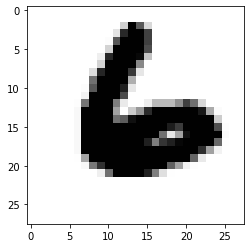

In [141]:
plt.imshow(X_test[3602].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

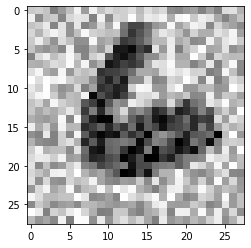

In [139]:
plt.imshow(X_test_mod[3602].reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

In [136]:
knn_clf.fit(X_train_mod, y_train_mod)

KNeighborsClassifier()

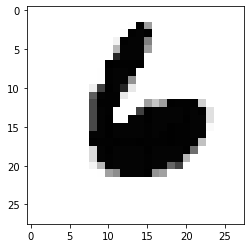

In [140]:
plt.imshow(knn_clf.predict([X_test_mod[3602]]).reshape(28,28), cmap=matplotlib.cm.binary, interpolation='nearest')

In [148]:
rf_clf.predict([X_test[3602], X_test_mod[3602], [clean_digit]]),[clean_digit])

TypeError: predict() takes 2 positional arguments but 3 were given

In [147]:
clean_digit = knn_clf.predict([X_test_mod[3602]])

In [149]:
clean_digit

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   2., 255.,  98.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   3., 252., 251.,
        253.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,  12., 252., 251., 251., 126.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0., 